In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import truncnorm

sns.set(rc={'figure.figsize':(11.7,8.27)})

seed = 11148705
np.random.seed(seed)

In [10]:
from rr_model.model import Industry
from rr_model.network import Network

In [11]:
def plot_graph(G):
    pos = nx.get_node_attributes(G, 'pos') 
    dists = [(x - 0.5)**2 + (y - 0.5)**2 for x, y in list(pos.values())]
    ncenter = np.argmin(dists)
    
    p = nx.single_source_shortest_path_length(G, ncenter)
    plt.figure()
    nx.draw_networkx_edges(G, pos, alpha=0.4)
    nx.draw_networkx_nodes(
        G, pos, nodelist=list(p.keys()),
        node_size=120, alpha=1,
        node_color=list(p.values()), cmap="jet")
    
    plt.show()


In [12]:
def simulate(net: Network, iters=150, verbose=True, f=2):
    if verbose:
        print("Bringing to steady...")

    net.bring_to_steady(iters=iters, verbose=verbose)
    n = len(net)

    prev_wage = net[n-1].wage
    next_wage = prev_wage*f

    net[n-1].wage = next_wage

    if verbose:
        print(f"Wage: {prev_wage} -> {next_wage}")

    data = [[] for _ in range(n)]

    base = [net[i].aggregate_prod for i in range(n)]

    if verbose:
        print("Shock...")

    for _ in range(iters):
        if verbose:
            print(f"{_+1}/{iters}", end='\r')

        for i in range(n):
            net[i].step()
            prod = net[i].aggregate_prod / base[i]
            data[i].append(prod)

    net[n-1].wage = prev_wage

    if verbose:
        print("...recovery...")

    recovery_iters = iters*3

    for _ in range(recovery_iters):
        if verbose:
            print(f"{_+1}/{recovery_iters}", end='\r')

        for i in range(n):
            net[i].step()
            prod = net[i].aggregate_prod / base[i]
            data[i].append(prod)

    if verbose:
        print("...done!")

    return pd.DataFrame(data).T

In [13]:
def make_graph(l, u, N=30):
    theta_one = 0.2
    theta_two = 0.2
    overhead = 0.06

    p = {i: (np.random.uniform(0, 1), np.random.uniform(0, 1)) for i in range(N)}
    Is = {
        i:{
            "I": Industry(
                fixed_overhead=overhead,
                alpha=3,
                theta_one=theta_one,
                theta_two=theta_two,
            )
          } for i in range(N)
    }
    
    G = nx.random_geometric_graph(N, .4, pos=p, seed=seed)
    nx.set_node_attributes(G, Is)

    return G

/home/nofishlikeian/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


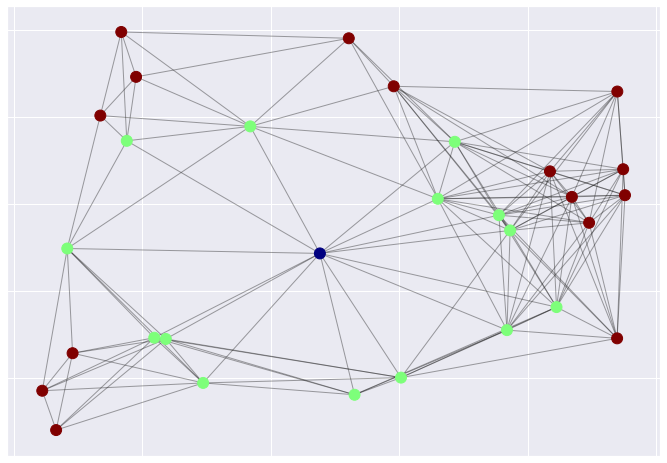

In [14]:
G = make_graph(0.01, 0.1)
plot_graph(G)

In [15]:
simulate(G)

Bringing to steady...


AttributeError: 'Graph' object has no attribute 'bring_to_steady'